In [268]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam
import pandas as pd
import numpy as np

In [269]:
file = pd.read_csv(r'C:\Users\belve\Downloads\bank.csv')
file_copy = file.copy()
file = file_copy
file.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [270]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [271]:
file.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [272]:
file.duplicated().sum()

0

In [273]:
file = file[file.job != 'unknown']

In [274]:
file = file[file.education != 'unknown']

In [275]:
file['contact'] = file['contact'].replace('unknown','other_contact')

In [276]:
file.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,other_contact,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,other_contact,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,other_contact,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,other_contact,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,other_contact,5,may,673,2,-1,0,unknown,yes


<Axes: >

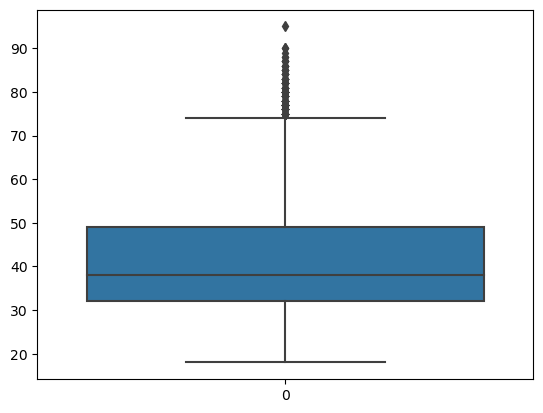

In [277]:
import seaborn as sns
sns.boxplot(file['age'])

In [ ]:
#def outliers(df, ft):
    #Q1 = df[ft].quantile(0.25)
    #Q3 = df[ft].quantile(0.75)
    #IQR = Q3 - Q1
    #lower_boundary = Q1 - (IQR * 1.5)
    #upper_boundary = Q3 + (IQR * 1.5)
    #outliers_index = df.index[(df[ft] < lower_boundary) | (df[ft] > upper_boundary)]
    #return outliers_index

In [ ]:
#outliers_list = []
#for feature in ['age']:
    #outliers_list.extend(outliers(file, feature))

In [ ]:
#outliers_list

In [ ]:
#new_file = remove_outliers(file, outliers_list)

In [ ]:
#new_file

In [278]:
one_hot = pd.get_dummies(file, columns=['job','marital','education','default','housing','loan','contact','month','poutcome'])
one_hot

,age,balance,day,duration,campaign,pdays,previous,deposit,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,59,2343,5,1042,1,-1,0,yes,1,0,...,0,0,1,0,0,0,0,0,0,1
1,56,45,5,1467,1,-1,0,yes,1,0,...,0,0,1,0,0,0,0,0,0,1
2,41,1270,5,1389,1,-1,0,yes,0,0,...,0,0,1,0,0,0,0,0,0,1
3,55,2476,5,579,1,-1,0,yes,0,0,...,0,0,1,0,0,0,0,0,0,1
4,54,184,5,673,2,-1,0,yes,1,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,20,257,1,-1,0,no,0,1,...,0,0,0,0,0,0,0,0,0,1
11158,39,733,16,83,4,-1,0,no,0,0,...,1,0,0,0,0,0,0,0,0,1
11159,32,29,19,156,2,-1,0,no,0,0,...,0,0,0,0,0,0,0,0,0,1
11160,43,0,8,9,2,172,5,no,0,0,...,0,0,1,0,0,0,1,0,0,0


In [279]:
x = one_hot.drop(columns=['deposit'])

In [280]:
x = np.asarray(x)

In [281]:
x

array([[  59, 2343,    5, ...,    0,    0,    1],
       [  56,   45,    5, ...,    0,    0,    1],
       [  41, 1270,    5, ...,    0,    0,    1],
       ...,
       [  32,   29,   19, ...,    0,    0,    1],
       [  43,    0,    8, ...,    0,    0,    0],
       [  34,    0,    9, ...,    0,    0,    1]], dtype=int64)

In [282]:
encoded = pd.get_dummies(file['deposit'])
encoded

,no,yes
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
11157,1,0
11158,1,0
11159,1,0
11160,1,0


In [283]:
y = np.asarray(encoded)
y

array([[0, 1],
       [0, 1],
       [0, 1],
       ...,
       [1, 0],
       [1, 0],
       [1, 0]], dtype=uint8)

In [284]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)

In [285]:
model = Sequential()

In [286]:
model.add(Dense(10, input_dim=49, activation='relu'))
model.add(Dense(10, input_dim=10, activation='relu'))
model.add(Dense(10, input_dim=10, activation='relu'))
model.add(Dense(10, input_dim=10, activation='relu'))
model.add(Dense(10, input_dim=10, activation='relu'))
model.add(Dense(10, input_dim=10, activation='relu'))
model.add(Dense(10, input_dim=10, activation='relu'))
model.add(Dense(2, activation='softmax'))

In [287]:
optimizer = Adam(learning_rate=0.005)

In [288]:
model.compile(
    loss='categorical_crossentropy',
    optimizer = optimizer,
    metrics=['accuracy']
)

In [289]:
mycallbacks = [EarlyStopping(monitor='accuracy', patience=2)]

In [290]:
model.fit(x_train, y_train, epochs=1000, batch_size=24 , callbacks = mycallbacks, verbose=2)

Epoch 1/1000
355/355 - 4s - loss: 0.8312 - accuracy: 0.6589 - 4s/epoch - 12ms/step
Epoch 2/1000
355/355 - 1s - loss: 0.5508 - accuracy: 0.7325 - 1s/epoch - 3ms/step
Epoch 3/1000
355/355 - 1s - loss: 0.5107 - accuracy: 0.7616 - 1s/epoch - 4ms/step
Epoch 4/1000
355/355 - 1s - loss: 0.4757 - accuracy: 0.7771 - 1s/epoch - 4ms/step
Epoch 5/1000
355/355 - 1s - loss: 0.4667 - accuracy: 0.7843 - 1s/epoch - 4ms/step
Epoch 6/1000
355/355 - 1s - loss: 0.4565 - accuracy: 0.7843 - 1s/epoch - 4ms/step
Epoch 7/1000
355/355 - 1s - loss: 0.4550 - accuracy: 0.7865 - 1s/epoch - 3ms/step
Epoch 8/1000
355/355 - 1s - loss: 0.4520 - accuracy: 0.7930 - 1s/epoch - 4ms/step
Epoch 9/1000
355/355 - 1s - loss: 0.4534 - accuracy: 0.7952 - 1s/epoch - 3ms/step
Epoch 10/1000
355/355 - 1s - loss: 0.5034 - accuracy: 0.7503 - 1s/epoch - 4ms/step
Epoch 11/1000
355/355 - 1s - loss: 0.4399 - accuracy: 0.7990 - 1s/epoch - 4ms/step
Epoch 12/1000
355/355 - 1s - loss: 0.4354 - accuracy: 0.8031 - 1s/epoch - 4ms/step
Epoch 13/100

In [291]:
results = model.evaluate(x_test, y_test)
print("Précision sur l'ensemble de donnée : %.2f" % results[1])

67/67 [==============================] - 1s 3ms/step - loss: 0.4080 - accuracy: 0.8185
Précision sur l'ensemble de donnée : 0.82
